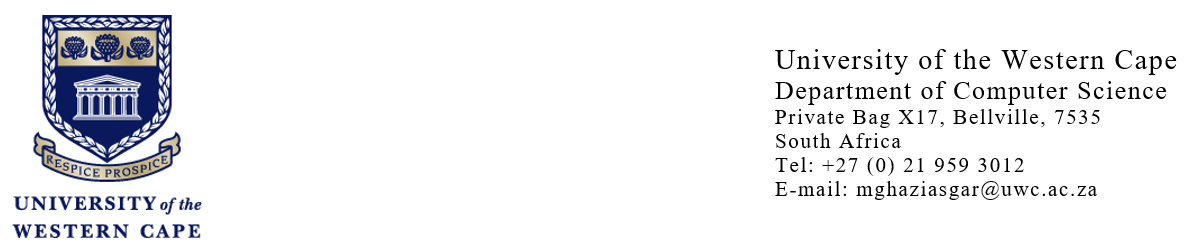

# CSC311 – Machine Learning 2022 – Logistic Regression 

# Assignment 2

This is the second assignment of the machine learning course and will be the only assignment on logistic regression. This notebook is detailed enough and clearly specifies what you are required to do. This notebook does not contain any interactive feedback cells. Rather, at each stage of the assignment, you're given complete detail on what to do along with possible (expected) results, in order to give you an indication of whether you are on track with your implementation.

This assignment requires you to implement logistic regression and apply it to two different datasets. The data sets are provided along with this notebook. The assignment consists of two parts (using two different data sets). The first part deals with non-regularized logistic regression while the second part considers regularized logistic regression.

**Important Note**: Please take care to only fill in code between the two comments that I put in as follows:

```
#FILL IN BELOW

#STOP FILLING IN HERE
```

Hardly anything else needs to be changed. There are things you can toy with though. Use your discretion. This **is** for marks after all.

Marks aside, I spent uncountable hours creating and carefully tweaking this notebook to give you exposure to almost every concept we discussed in class so please try and use this to learn. You will see it all in action. After you're done marking, feel completely free to toy with parameters e.g. try increasing (or decreasing) the degree of the polynomial used in the second part of the assignment, and see what the effect is; try increasing or decreasing learning rates, number of iterations etc. There's lots to be learned here.

And do note that logistic regression's cost function is a bit (actually a LOT) more sensitive than that of linear regression; one wrong move and you either have ```NaN``` or ```InF``` errors. So when you toy with things, try and make small changes to initial $\theta$ and $\alpha$ parameters, especially e.g. might not be such a good idea to go from $\alpha=0.1$ suddenly to $\alpha=1000000$.

**Submission**:

You will need to upload your final working notebook onto the relevant iKamva CSC311 Assignment page. **Please take note of the following important points (and doing so will ensure that you don't lose unnecessary marks)**:

1. Please fill in your student number in the cell below this one. This is necessary for auto-marking purposes.

2. DO NOT zip or compress your file in anyway. Upload only the raw ".ipynb" notebook file itself.

3. Make sure that you only have one finalized version of your notebook uploaded. iKamva allows you to make several submissions and stores them all. You need to finally only keep the latest one that you want marked, otherwise we won't know which one to mark.

4. DO NOT re-upload the data files along with your submission. You only need to submit your ".ipynb" file.


Bon apetit.

### VERY IMPORTANT: YOUR STUDENT NUMBER

Please set the mystudentnumber variable below to your student number.

In [1]:
mystudentnumber = "3934655" #Please set this.

### Some Initializing Code

Run the code below to initialize the notebook.

In [2]:
import numpy as np
from IPython.display import display,HTML

np.set_printoptions(suppress=True)
ass_date_met = "7721hdjfh56nkf771!190sd1hdjfhjhs0071!skskhb0091hdjfh77262jhdywyyuqkjbsdu0811hdjfhnkf771!hslknhd7612oi7!#daiw@_djdegffjd$##*Dkdjhq91hdj1hdjfhfhjhdfi1998nkf771!7nkknkf771!@#!@likkhdh1hdjfhuhs919872863jnjhg23" 
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Part 1 - (Non-Regularized) Logistic Regression

In this problem, you take the role of a data scientist hired by the mathematics teacher of a high school. The maths teacher wants to select students to participate in the national maths Olympiad. To screen the students, the teacher administers two internal maths tests, and has been using the results of the two tests to somehow determine which students might qualify for the national Olympiad (using gut-feel). Although there are exceptions, the teacher is convinced that there is a trend between the two scores that students get in their internal tests, and whether or not they successfully qualify for the national Olympiad in the national qualifying test. He has kept records of the scores of numerous students over the years, as well as whether or not they qualified for the national Olympiad.

The administrator has hired you to build a model that can determine a student's chances of entry into the national tournament based on their two internal test scores. In this part of the assignment, your task is to build a classifier  to do exactly this.

## Reading, Readying, and Plotting the Data

### Reading in the Data

The first step is to load the data. The data for this part is provided in a ```csv``` file called ```data1.csv``` which contains three columns of data: the first and second columns represent the scores in the two internal tests of a specific student; the third column represents whether the student later qualified for the national Olympiad (```1```) or not (```0```). I've graciously put in the code to import ```numpy``` and to import the data as a ```numpy``` array into the variable ```data1```. I've also put in code that uses the ```pandas``` library to display the top 10 rows of the data (this comes very in handy when you want to get a preview of what the data looks like).

In [3]:
### Importing some useful packages
#This ensures that plots appear in the sheet and not in a new window
# % matplotlib inline 
import numpy as np

#Pandas is an alternative numerical processing library like numpy: they have differences
#We will use Pandas only to provide a preview of the data once we've read it in
import pandas as pd


data = np.genfromtxt('data1.csv',delimiter=",")

#Convert the numpy array to a pandas DataFrame
#and display the first 10 rows as html
display(pd.DataFrame(data).head(10))

,0,1,2
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
5,45.083277,56.316372,0.0
6,61.106665,96.511426,1.0
7,75.024746,46.554014,1.0
8,76.098787,87.420570,1.0
9,84.432820,43.533393,1.0


### Setting X, y, m and n

You did this in the Linear Regression practical so I've just put it in (you're welcome). Carefully examine the code in, and then run, the cell below and let's move on.

It sets ```X```, ```y```, ```m``` and ```n```. It also does something else: it creates a separate array for the scores of test 1 (```X1```), and a separate array for test 2 scores (```X2```). This will come in handy when we want to plot X1 scores versus X2 scores shortly. 

I've also put in some code that makes use of the ```Pandas``` library (a library that adds a lot of extra convenient functionality to ```numpy```) to just display pretty-looking previews of the respective matrices/vectors. Feel free to look up that library in your own time - it could come in handy.

In [4]:
#Set m and n
m = data.shape[0]
n = data.shape[1]-1 #The final column is not a feature; it's the target variable

#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X = data[:,0:n]
y = data[:,n].reshape(m,1)

#Also set X1 and X2
X1 = data[:,0].reshape(m,1)
X2 = data[:,1].reshape(m,1)

#Now display X and y to make sure they look
#like they've been set correctly
print("X:")
display(pd.DataFrame(X).head(10))

print("\ny:")
display(pd.DataFrame(y).head(10))

print("\nX1:")
display(pd.DataFrame(X1).head(10))

print("\nX2:")
display(pd.DataFrame(X2).head(10))


#Xpos = X[:,ybool]
#Xneg = !X[ybool]
print(X)




X:


,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
5,45.083277,56.316372
6,61.106665,96.511426
7,75.024746,46.554014
8,76.098787,87.420570
9,84.432820,43.533393



y:


,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
5,0.0
6,1.0
7,1.0
8,1.0
9,1.0



X1:


,0
0,34.623660
1,30.286711
2,35.847409
3,60.182599
4,79.032736
5,45.083277
6,61.106665
7,75.024746
8,76.098787
9,84.432820



X2:


,0
0,78.024693
1,43.894998
2,72.902198
3,86.308552
4,75.344376
5,56.316372
6,96.511426
7,46.554014
8,87.420570
9,43.533393


[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

### Visualizing the Data (If Possible)

Once loaded, it is a good idea to try  and visualise the data. Generally in data science, visualising the data is recommended (where possible) in order to give you a sense of the underlying structure of the data and/or the kind of function that you may need to use as a decision boundary. However, **note** that for more than two features in a classification model, this is not possible, unless you plot them in pairs, or something like that...

For a plot like this, the most straight-forward way to do this plot is to first separate examples in X according to whether they qualified or not, and then plot the two sets of samples on the same plot in different colours e.g. somehow get the samples of ```X``` that qualified into a new matrix e.g. ```Xpos```, and those that didn't qualify into a new matrix e.g. ```Xneg```. You can use boolean indexing to do this (see the Jupyter and ML Review Notebook I gave you). Then plot ```Xpos``` in a specific colour e.g. red, and ```Xneg``` in another colour e.g. blue, both on the same plot.

SO, first start by filling in the function below which should index into ```X``` to filter out positive and negative examples based on their corresponding ```y``` labels and return them into the relevant array variables.

**NOTE:** You should _absolutely_ avoid looping through ```X``` using a loop of any sort. Rather, use numpy array boolean indexing to filter out ```X```.

**[2 marks]**

In [5]:
def getPosNegExamples(X,y):
    Xpos = 0
    Xneg = 0
    
    #FILL IN BELOW: Code to set Xpos and Xneg correctly
    ybool = y == 1
    y_bool = y==0
    Xpos = X[ybool]
    Xneg = X[y_bool]
    

    #STOP FILLING IN HERE
    
    return Xpos,Xneg

#Don't modify the code below!
#What it does: separate X1 values (scores of first test) into positive and negative cases
#Do the same for X2 values (scores of second test)
X1pos,X1neg = getPosNegExamples(X1,y)
X2pos,X2neg = getPosNegExamples(X2,y)

print("X1pos:")
display(pd.DataFrame(X1pos))

print("X2pos:")
display(pd.DataFrame(X2pos))

X1pos:


,0
0,60.182599
1,79.032736
2,61.106665
3,75.024746
4,76.098787
5,84.432820
6,82.307053
7,69.364589
8,53.971052
9,69.070144


X2pos:


,0
0,86.308552
1,75.344376
2,96.511426
3,46.554014
4,87.420570
5,43.533393
6,76.481963
7,97.718692
8,89.207350
9,52.740470


Next, use the four vectors ```X1pos```, ```X1neg```, ```X2pos``` and ```X2neg``` to plot a scatter plot of Score 1 versus Score 2 below. You can do this by first plotting ```X1pos``` and ```X2pos``` points in a specific colour (and possibly shape), and then plotting ```X1neg``` and ```X2neg``` points in a different colour (and possibly shape). Use ```matplotlib```'s ```pyplot``` library to do it - I've already imported it in the code snippet below. I've also already created a ```plt.figure``` in the code snippet in which your plot points will go. Search engines are your friend, although some of them spy on you and use your activity to profile you (so are those ones really friends? I digress...)

Please also note that the function takes in, as parameters:

- The names of the two axes (```xaxislabel``` and ```yaxislabel```) which should be placed next to the respective axes. Pass these to the relevant matplotlib function to set the axis names.
- 
- The names of the two classes that we are trying to separate (```y1label``` which is "Admitted" in this case, and ```y0label``` which is "Not admitted" in this case). Pass these to the relevant matplotlib function to create a legend for the data points, as seen in the bottom-left of the example graph in the image.

Finally, **VERY IMPORTANT**: DON'T include the line ```plt.show()``` in your function. The plot will still display just fine.

**[2 marks]**

If you did it correctly, you should see a plot that is somewhat similar to the Figure below:

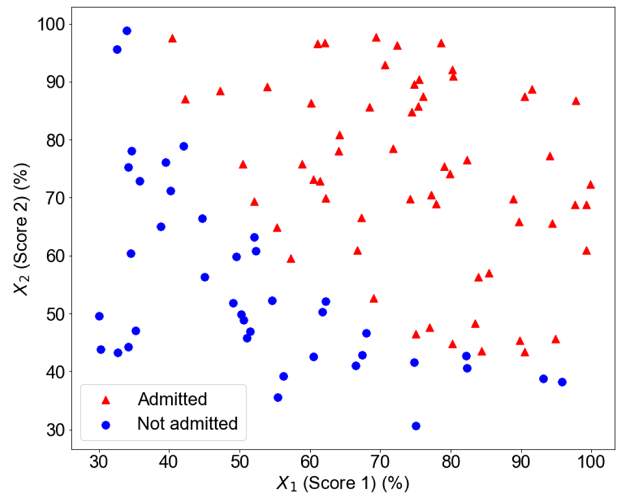

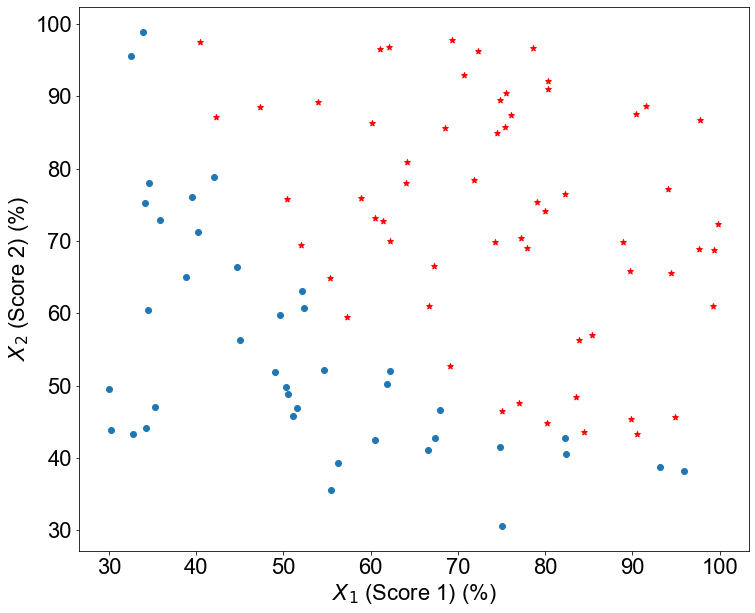

In [6]:
#Use matplotlib.pyplot - don't change lines below
import matplotlib
import matplotlib.pyplot as plt


def plotData(X1pos,X2pos,X1neg,X2neg,xaxislabel,yaxislabel,y1label,y0label,newfig=True):

    #Don't change any of this:
    #If a new figure is required:
    if newfig:    
        font = {'family' : 'Arial',
            'size'   : 22}

        matplotlib.rc('font', **font)
        fig = plt.figure(figsize=(12,10))
    
    
    #FILL IN BELOW: Fill in below your code to plot
    plt.xlabel(xaxislabel)
    plt.ylabel(yaxislabel)
    plt.scatter(X1pos,X2pos , label=y1label, c='red' , marker='*' )
    plt.scatter(X1neg,X2neg , label = y0label)
    
    
    #STOP FILLING IN HERE
    
    return
    

#Dont' modify the line below in any way
plotData(X1pos,X2pos,X1neg,X2neg,'$X_1$ (Score 1) (%)','$X_2$ (Score 2) (%)',"Admitted","Not admitted")

As discussed during lectures, the key premise of logistic regression is the assumption that the feature space can be separated into two separable regions by a decision boundary of some shape. Looking at the plot given above, we can clearly see that this is true for the data you've been given. Hopefully you can see that we can either use a straight line to separate the two classes, or a curved line (if we want to get fancy).

In the next couple of steps, we're going to implement the sigmoid function, followed by the logistic regression cost function, and finally gradient descent. 

## Part 1A - Solving For $\Theta$ Manually (Coding It From Scratch)

In this part, you'll be coding the sigmoid function, the cost function and gradient descent, towards obtaining the best $\Theta$ parameters that separate the above data.

You'll also be able to compare learning rates to determine the best one

### Implementing the Sigmoid Function
Remember that the hypothesis of logistic regression is given by:

<center>$\large h_\theta(x) = g(\theta^T x)$</center>

The sigmoid function (g) is given by:
<center>$\large g(z)= \dfrac{1}{1 + e^{-z}} $</center>

Recall that: this function (sigmoid($z$)) maps any real number (say $z$) to the $(0,1)$ interval; sigmoid(0) is exactly 0.5 i.e. the sigmoid curve cuts the y-axis at 0.5; for large negative values of $z$, the sigmoid should be very close to 0; and for large positive values of $z$, the sigmoid curve should be close to 1.

**Ensure that your code can also work with matrices and vectors, in which case the sigmoid function works for every element in the matrix or vector.** Hint: If you take care to use numpy functions inside the ```sigmoid(z)``` function below, then your function will definitely work for arrays and matrices automatically. DON'T use any loops in the function. Complete the function definition below:

**[0.5 marks]**


In [7]:
def sigmoid(z):
    
    g=0
    
    #FILL IN BELOW: Start filling in your code below: set g correctly
    e = 2.718281828459045
    g = 1 / (1 + e**(-z))
   
    #STOP FILLING IN HERE

    return g

In [8]:
#This cell is for YOU to try out your sigmoid function to make sure it works correctly:
#Modify if you wish

print(sigmoid(0)) #Should be 0.5
print(sigmoid(100)) #Should be close to 1
print(sigmoid(-100)) #Should be close to 0

zarr = np.array([
    [-100],
    [0],
    [100]
])

print(sigmoid(zarr)) #Should print an np.array with three values: [~0, 0.5, ~1]

0.5
1.0
3.7200759760208555e-44
[[0. ]
 [0.5]
 [1. ]]


### Feature Scaling and Adding Feature $\large x_0$

Now let's first scale the features in ```X```. If we decide to use gradient descent to get our optimal $\Theta$ parameters, feature scaling becomes just as important as it was in linear regression with gradient descent. In the previous practical, you implemented (or at least we hope you did) feature scaling. Here, we're rather going to use ```sklearn.preprocessing```'s ```StandardScaler``` library to do it for us (refer to the slides if you need to, or use a non-nefarious search engine to help you). 

Below, complete the function ```getScaled``` with code that makes a call to the StandardScaler to scale ```X```. Remember that ```X``` still doesn't include the column of 1s of feature $x_0$: this is because we don't scale $x_0$. Fill in the following code in the function below:

```python
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
```

The code sets ```X_scaled``` and ```scaler``` correctly and both of these are returned with the function. The reason we return the ```scaler``` is: once we've (later on) got the ideal $\Theta$ parameters for the scaled data, we will be able to use the scaler (that is fitted here to ```X```) to transform those $\Theta$ parameters back into the same space as the original data; we will do this so that we can draw the decision boundary that the $\Theta$ parameters represent on the graph that was drawn earlier.

In [9]:
from sklearn.preprocessing import StandardScaler

def getScaledX(X):
    X_scaled = np.zeros(X.shape)
    scaler = None
    
    #FILL IN BELOW:
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    
    #STOP FILLING IN HERE
    
    return X_scaled,scaler


X_scaled,scalerpt1 = getScaledX(X)

And now that we've got a scaled version of ```X```, I'm going to add a columns of 1s to it that represent feature $x_0$:

In [10]:
#Don't change in any way
X_mod = np.hstack([np.ones((m,1)),X_scaled]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on

#Preview contents of X_mod with Pandas
pd.DataFrame(X_mod).head(10)

,0,1,2
0,1.0,-1.602248,0.638341
1,1.0,-1.826256,-1.207541
2,1.0,-1.539040,0.361294
3,1.0,-0.282101,1.086368
4,1.0,0.691528,0.493378
5,1.0,-1.061997,-0.535739
6,1.0,-0.234372,1.638184
7,1.0,0.484511,-1.063730
8,1.0,0.539987,1.146511
9,1.0,0.970448,-1.227099


### Cost Function

Recall that the cost function of logistic regression is different from that of linear regression. The cost function for logistic regression is defined as:

$$
\large J(\theta) = −\frac{1}{m}\sum \limits _{i=1}^m [y^{(i)} log(h_\theta (x^{(i)} )) + (1 − y^{(i)} ) log(1 − h_\theta (x^{(i)} ))]
$$

<u>**In vectorized form**</u>, this is given by:
$$
\large 
J(\Theta) = −\frac{1}{m}\Big( y^T \cdot \ln(g(X\Theta)) + (1 - y^T) \cdot \ln(1-g(X\Theta)) \Big)\\
$$

Feel free to confirm for yourself that the vectorized expression has exactly the same result and outcome as the iterative one. Also, for computational purposes and to keep your code neat, it may be a really good thing to compute $g(X\Theta)$ once and then plug it into the expression above inside the $\ln()$ functions, but it's not the end of the world if you don't (you decide).

Below, go ahead and complete the function definition given to you so that the function computes the cost using the **vectorized** equation above, and returns the cost as a single value (NOT an array).

**[2.5 marks]**

In [11]:
def costJ(thetas, X, y):
    J = 0
    m = X.shape[0] #You may need this

    #FILL IN BELOW: Start filling in your code below: set J correctly (comopute the cost)
    
    gX0 = sigmoid(X.dot(thetas))
    J_a = -1/m *((y.transpose()).dot( np.log(gX0)) + (1 - y.transpose()).dot(np.log(1 - gX0)))
    J = J_a[0][0]
    #STOP FILLING IN HERE

    return J #A single value - NOT a matrix/vector/list

Use the snippet below to confirm for yourself that you function works. Note that:
- for $\theta = [0,0,0]$, the cost should be about 0.693
- for $\theta = [5,5,5]$, the cost should be about 0.395
- for $\theta = [-5,-5,-5]$, the cost should be about 6.717

In [12]:
initthetas = np.array([[5],[5],[5]])
print("For theta = " + str(initthetas.ravel()), ", your cost function returns " + str(costJ(initthetas, X_mod, y)))

For theta = [5 5 5] , your cost function returns 0.39459919719406666


### Gradient Descent

Now that we have the cost function, we can use it to carry out gradient descent. Recall that gradient descent involves continuously making updates to every $\theta_j$; we do this by subtracting the slope/gradient of the cost function $J(\theta)$ with respect to each $\theta_j$ from $\theta_j$; this is given by:

$$
\large
\theta_j \leftarrow \theta_j - \alpha\frac{\partial J(\theta)}{\partial \theta_j}
$$

where $j$ is $\{0,\ldots,n\}$, and $\frac{\partial J(\theta)}{\partial \theta_j}$ are the slope/gradients of $J(\theta)$ with respect to each $\theta_j$. 

We saw in the lectures that when we substitute for $J(\theta)$ for logistic regression and differentiate the gradients $\frac{\partial J(\theta)}{\partial \theta_j}$, we get the following:

$$
\large
\theta_j \leftarrow \theta_j - \frac{\alpha}{m} \sum \limits _{i=1}^m(g(\theta^Tx^{(i)})- y^{(i)} ) x^{(i)}_j\\
$$

<u>**In vectorized form**</u>, the same expression for gradient descent for logistic regression can be written as:

$$
\large 
\Theta \leftarrow \Theta - \frac{\alpha}{m} \Big[X^T \big(g(X\Theta)-y\big)\Big]
$$

where $y$ here is a vector of all the $y$-values. Therefore, below, go ahead and complete the function given to use this vectorized expression to carry out gradient descent for logistic regression. Note that, in the function below, I've included code that stores the cost at each iteration of gradient descent (the same way as I did in the linear regression assignment). Later, we can use these costs to determine a good learning rate.

**[2.5 marks]**

In [13]:
def gradientDescent(X, y, thetas, alpha, max_iterations):
    J_hist = []
    J_hist.append(costJ(thetas, X, y))

    for ite in range(max_iterations):

        #FILL IN BELOW: but there shouldn't be a loop in here
        gX0 = sigmoid(X.dot(thetas))
        
        thetas = thetas - (alpha / m)*((np.transpose(X)).dot(gX0 - y))

        #STOP FILLING IN HERE: Don't modify the code below this point

        J_hist.append(costJ(thetas, X, y))

    return thetas, J_hist

Ok, now the box below makes a call to the gradient descent function. Note that, to check if your code appears to be working correctly, gradient descent should give the following values:

- Using Initial $\Theta = [0,0,0]$, $\alpha = 0.01$, 400 iterations: Optimal $\Theta \approx [0.26567183, 0.74789721, 0.66872387]$
- Using Initial $\Theta = [5,5,5]$, $\alpha = 0.05$, 600 iterations: Optimal $\Theta \approx [3.05808214, 5.46995321, 5.34720433]$
- Using Initial $\Theta = [-5,-5,-5]$, $\alpha = 0.1$, 800 iterations: Optimal $\Theta \approx [1.12296422, 2.73933418, 2.51534046]$


In [14]:
#This snippet is for YOU: modify as you wish
#Use this snippet to check if gradient descent works correctly
initthetas = np.array([[0],[0],[0]])
optthetas, costs = gradientDescent(X_mod,y,initthetas,0.01,400)
print("Optimal thetas:")
print(optthetas)

Optimal thetas:
[[0.26567183]
 [0.74789721]
 [0.66872387]]


### Comparing Learning Rates

Below, I've graciously put in code that plots the cost versus the iteration number of gradient descent for a series of different learning rates. Look at the graphs, feel free to make changes to the learning rates in the ```alphatotry``` list and compare different learning rates. Use it to determine the best $\alpha$ to use with this data set. This is for marks.

Don't change anything except the numbers in the list ``alphatotry`` in this code snippet (unless you really want to). Note that you can have up to seven learning rates in the ``alphatotry`` list, which the plot will automatically draw and you can then compare. You can, however, have fewer than seven items in the list too. Use the plot to determine the best learning rate to use. You will then set the value that you determine in a cell further down below.

**[0.5 marks]**

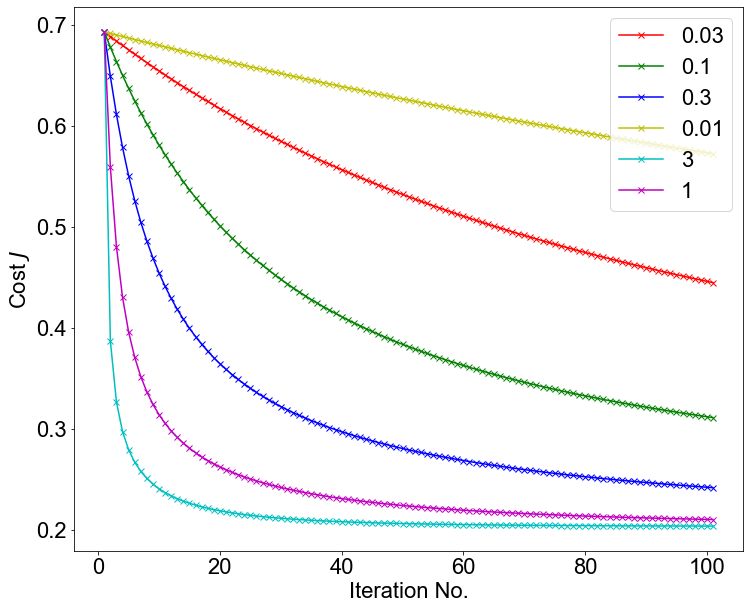

In [15]:
#Don't change anything except variable ``alphatotry`` in this code snippet (unless you really want to). Note that
#you can have up to seven learning rates in the ``alphatotry`` list, which the plot will automatically draw
#and you can then compare. You can, however, have fewer than seven items in the list too.
#But do look through it to see what it's doing.

alphatotry = [0.03, 0.1, 0.3, 0.01, 3, 1]

#Don't edit anything below this point (unless you insist on doing so)

import numpy as np
import matplotlib
from pylab import *

def plotLearningRates(X,y,alphas):
    
    plotcol = ['r','g','b','y','c','m','k']

    retJhistforalphas = []
    for alphait in alphas:
        initthetas_ = np.array([[0],[0],[0]])
        _, retJ_hist = gradientDescent(X, y, initthetas_ , alphait, 100)
        retJhistforalphas.append(retJ_hist)

    xplot = np.linspace(1,len(retJhistforalphas[0]),int(len(retJhistforalphas[0])))

    figure(figsize=(12,10))

    for it, retJhistit in enumerate(retJhistforalphas):
        plot(xplot, np.array(retJhistit), c=plotcol[it], marker='x',label=str(alphas[it]))

    xlabel('Iteration No.')
    ylabel('Cost $ J$')
    legend(loc=1)
    show()
    
plotLearningRates(X_mod, y, alphatotry)

Hopefully you've now determined a good $\alpha$ to use. Set it's value in the code snippet below. It will be used in cells further down.

In [16]:
def getBestAlpha():
        
        #FILL IN BELOW: hardcode the best value for variable "bestalpha" below.
        
        bestalpha = 3 #Set this
        
        #STOP FILLING IN HERE: Don't modify the code below this point
        
        return bestalpha
    
bestalpha = getBestAlpha() #Don't change this line in anyway

### Plotting the Decision Boundary

By default the snippet below assumes the initial $\Theta$ to be $[0,0,0]$. A function call is then made to ```gradientDescent``` with your $\alpha$ to obtain the optimal $\Theta$ of the decision boundary. These are then used to plot the decision boundary. Look through the code to understand what it does and how it plots the boundary. I took special care to plot the boundary back into the original data space (not the scaled one) that we had, for your understanding.

Also, feel free to play around with ```initthetas``` and ```max_iterations``` to see how the decision boundary is affected.

(25.60326323428011, 103.86943574220611)

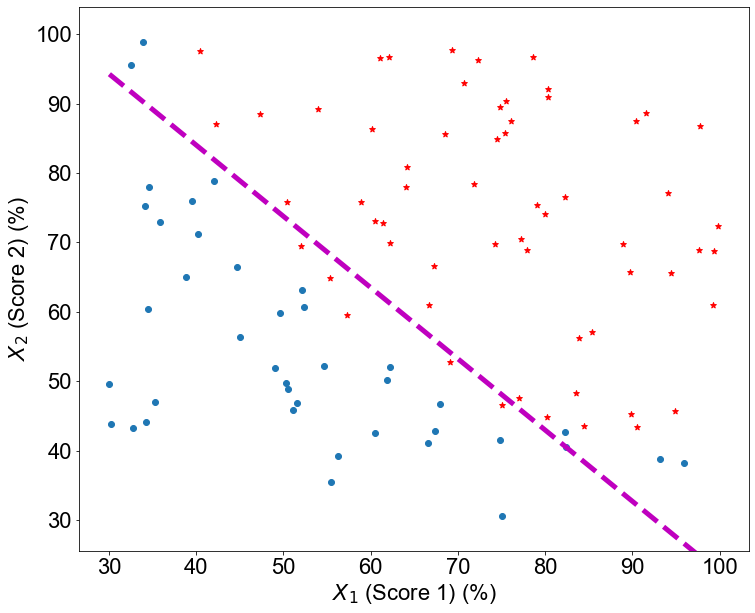

In [17]:

initthetas = np.array([[0],[0],[0]]) #Change this up if you like
max_iterations = 100 #This too

#Don't change anything below unless you really want to

optthetas, costs = gradientDescent(X_mod,y,initthetas,bestalpha,max_iterations)

#Not required to change the below; change only if you wish.
#Definitely take a look to see how it weks.

#Since our thetas obtained are in the scaled space, first work in the scaled space
#We need two points pt1 and pt2 both of the form  (X1,X2) to map out the boundary

#Get the min and max X1 values in the scaled space
X1minmax = np.array([[X_mod[:,1].min()],[X_mod[:,1].max()]])

#Now compute the corresponding X2 values in the scaled space
#using the thetas that we determined
#The equation below is X2 = (-theta0 - theta1 * X1)/theta2 which
#is a rearrangement from the original equation of the decision boundary
#given by: theta2*X2 + theta1*X1 + theta0 = 0
#Compute the corresponding X2 value for the min and max X1 values:
X2equiv = -(optthetas[0] +optthetas[1]*X1minmax)/optthetas[2]

#Now build up a matrix [X1vals, X2vals] by stacking the [X1,X2] vals
#found above
linepts_scaled = np.hstack((X1minmax,X2equiv))

#Now, CRUCIAL: use the scaler we used to scale X originally
#to INVERSE_TRANSFORM these points back to the original space
linepts_orig = scalerpt1.inverse_transform(linepts_scaled)

#Ok now plot the original data points
plotData(X1pos,X2pos,X1neg,X2neg,'$X_1$ (Score 1) (%)','$X_2$ (Score 2) (%)',"Admitted","Not admitted")
#Finally, now just plot the two points to make a line
plt.plot(linepts_orig[:,0],linepts_orig[:,1],c='m',linestyle='dashed',lw=5)

#Just ensure that the y-scale of the plot doesn't change much from what it had
#with the original data
plt.ylim(X[:,1].min()-5,X[:,1].max()+5)

### Making Predictions

Now that we have the optimal $\Theta$ parameters (hopefully), we can make predictions. In this part, we don't have a test set to test (make predictions) on, so we'll just use the train set to do that.

For now, though, fill out the function below which takes in a matrix ```X``` that is assumed to be correctly scaled (into the same space as the training data was) and is assumed to **include** the column of ones (feature $x_0$) and computes the logistic regression hypothesis value (which is the prediction) according to the following vectorized expression:

$$
\large
h_\theta(X) = g(X\theta)
$$

where $g(z)$ here is the sigmoid function applied to an input $z$. It should then also apply a threshold to the $h_\theta(X)$ values to place them either into class $y_\text{pred}=0$ or $y_\text{pred}=1$ as follows:

$$\large
y_\text{pred} = 
\begin{cases}
1\>\>\>\text{if}\>\>\>h_\theta(X)\geq0.5\\
0\>\>\>\text{if}\>\>\>h_\theta(X)<0.5
\end{cases}
$$

**[3 marks]**

In [18]:
def predict(X, thetas):
    
    hx = np.zeros((X.shape[0],1))
    
    #FILL IN BELOW: Code to compute the hypothesis (predictions) on X using thetas; store into "hx"
    g = sigmoid(X.dot(thetas))
    hx = g
    
    #STOP FILLING IN HERE
    
    
    
    ypred = np.zeros_like(hx)
    
    #FILL IN BELOW: Carry out a filter on hx; set the value of elements in "ypred" to 0 if hx<0.5 or 1 if hx>=0.5
    for i in range(X.shape[0]):
        if (hx[i][0] >= 0.5):
            ypred[i][0] = 1
            
        elif (hx[i][0] < 0.5):
            ypred[i][0] = 0
    
    #STOP FILLING IN HERE
    
    return ypred
    
    
#Let's just call gradient descent again to get some ideal theta params
initthetas = np.array([[0],[0],[0]])
goodalpha = 0.01
max_iterations=1000
optthetas, costs = gradientDescent(X_mod,y,initthetas,goodalpha,max_iterations)

#Ok now pass in the training set and the optthetas
ypred = predict(X_mod, optthetas)
print(ypred.squeeze()) #Squeeze just removes one dimension so that when we print it, it appears on one line (for good viewing)


[0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]


Above: if you did it right, you should expect to get an array like (good luck comparing them with your eyes, or maybe you can think of a smarter way...):

```[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]```

### Computing Classification Metrics

To compute performance metrics for the model, you hopefully now know that (for classification) you will need to draw up a confusion matrix. For a binary problem (such as this one), the confusion matrix has only four entries: True Positives (TP), False Positives (FP), True Negatives (TN) and False Negatives (FN). Complete the function below that takes in the actual ```y``` matrix, our predicted ```ypred``` values, and returns these four entries. Avoid looping through the matrices: try to use numpy indexing and filtering to do it; or chicken-out and use loops; your choice.

If you do it correctly, you should get ```(55, 5, 35, 5)``` which correspond, respectively, to the ```(TP,FP,TN,FN)```.

**[3 marks]**

In [19]:
def getConfMatrixEntries(yactual, ypred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    #FILL IN BELOW: Set the above variables correctly
    for i in range(yactual.shape[0]):
        
        if ((yactual[i][0] == ypred[i][0]) and ((ypred[i][0]==1) or (yactual[i][0] == 1))):
            TP = TP + 1
        
        elif((yactual[i][0] != ypred[i][0]) and ((ypred[i][0]==1))):
            FP = FP + 1
            
        elif((yactual[i][0] == ypred[i][0]) and ((ypred[i][0]==0) or (yactual[i][0] == 0))):
            TN = TN + 1
        
        elif((yactual[i][0] != ypred[i][0]) and ((ypred[i][0]==0) )):
            FN += 1
    
    #STOP FILLING IN HERE
    
    return TP,FP,TN,FN

TP,FP,TN,FN = getConfMatrixEntries(y,ypred)
print((TP,FP,TN,FN))


(55, 5, 35, 5)


Ok, now we can compute a whole bunch of metrics.

$$
\text{Accuracy} = \frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}\times100
$$

$$
\text{Recall} = \frac{\text{TP}}{\text{TP+FN}}\times100
$$

$$
\text{Precision} = \frac{\text{TP}}{\text{TP+FP}}\times100
$$

$$
\text{F1 Score} = \frac{2\times\text{Recall}\times\text{Precision}}{\text{Recall}+ \text{Precision}}
$$

Below fill out the function that returns all four metric values. If you do it correctly, you should expect to see values of ```(90.0, 91.66666666666666, 91.66666666666666, 91.66666666666666)``` corresponding to ```(acc,recall,prec,f1)``` below.

**[2 marks]**

In [20]:
def getMetrics(TP,FP,TN,FN):
    
    #You will need to set all of the below variables correctly in the designated area below in this function
    acc = 0
    recall = 0
    prec = 0
    f1 = 0
    
    #FILL IN BELOW: Set the above variables correctly
    acc = ((TP+TN) / (TP+TN+FP+FN)) * 100
    recall = (TP / (TP+FN)) * 100
    prec = (TP / (TP+FP)) * 100
    f1 = (2*recall*prec)/(recall+prec)
    
    
    #STOP FILLING IN HERE
    
    return acc,recall,prec,f1

acc,recall,prec,f1 = getMetrics(TP,FP,TN,FN)
print((acc,recall,prec,f1))

(90.0, 91.66666666666666, 91.66666666666666, 91.66666666666666)


## Part 1B - Using ```sklearn``` to Do Most of the Same Things

Now, you'll make function calls to ```sklearn``` to do most of the above. 

First, we need to "fit" the model, which is the same as solving for the best-fit $\Theta$:

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, solver="liblinear")

#I'm "squeezing" y because sklearn expects y to be a rank 1 array... 
res = clf.fit(X, y.squeeze())

#Normally, we won't need the thetas when using sklearn, but if you do, here they are:
skloptthetas = [res.intercept_[0],res.coef_[0,0],res.coef_[0,1]]

print("Thetas are: " + str(skloptthetas))
print("Probably the only reason we'd need these now is to plot the decision boundary...")

Thetas are: [-3.8997779447047614, 0.038444815554882994, 0.03101854556290881]
Probably the only reason we'd need these now is to plot the decision boundary...


Now **YOU** can use the thetas obtained from sklearn to plot the decision boundary. You could, if you wanted to, make use of the function ```plotData``` that you completed earlier to plot the original points; if you do this, you will just need to add a few more lines to then also draw on the decision boundary line on the same graph. Anyway, it's up to you. Your plot should end up looking something like the image below:

**[1 mark]**

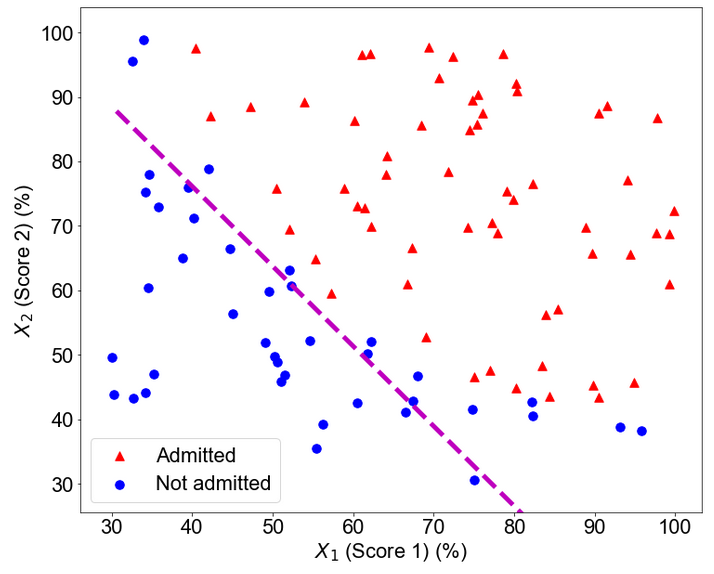

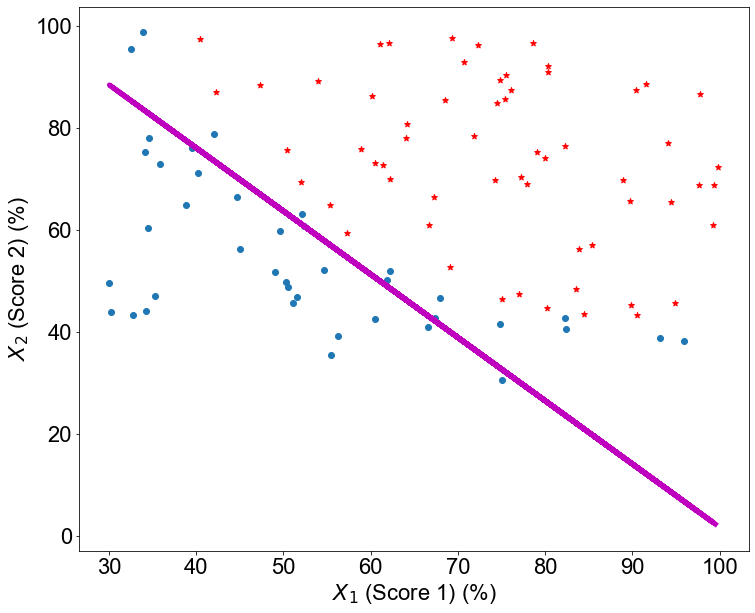

In [22]:
#FILL IN: Plotting code
theta0 = -skloptthetas[0]
theta1 = skloptthetas[1]
theta2 = skloptthetas[2]
decision_boundary = ((theta0/100) - (theta1/100)*X)/(theta2/100)
# plot the original data points
plotData(X1pos,X2pos,X1neg,X2neg,'$X_1$ (Score 1) (%)','$X_2$ (Score 2) (%)',"Admitted","Not admitted")
#plot the two points to make a line
plt.plot(X,decision_boundary,c='m',linestyle='dashed',lw=5)

Now, use the trained model (```clf```) to predict on/classify the training examples (as we did manually before). Fill in the function to use ```clf``` to carry out a prediction on ```X```. You should expect something like:

```
[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]```

**[0.5 marks]**

In [23]:
def predictSKL(clf, X):

    ypred = 0

    #FILL IN BELOW: Set ypred correctly
    ypred = clf.predict(X)

    #STOP FILLING IN HERE
    
    return ypred
    
ypred = predictSKL(clf, X)
print(ypred)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]


Now we'll get the confusion matrix from the ```sklearn.metrics``` library's ```confusion_matrix``` function:

In [24]:
import sklearn.metrics as sklm

sklm.confusion_matrix(y_true=y,y_pred=ypred)

array([[27, 13],
       [ 0, 60]], dtype=int64)

If you're wondering which are the FPs and FNs in the confusion matrix above, consult with the relevant sklearn documentation.

Now fill in the ```getMetricsSKL``` function below; use only functions in ```sklearn```'s ```metrics``` library to seamlessly compute all the metrics and store them in the indicated variables. If you did it correctly, the snippet below should display:

```
Accuracy is 87.0
Recall is 100.0
Precision is 82.1917808219178
F1 Score is 90.22556390977444
```

**[1 mark]**

In [25]:
#This was imported before, but just to be safe
import sklearn.metrics as sklm


def getMetricsSKL(ytrue,ypred):
    acc = 0
    rec = 0
    prec = 0
    f1 = 0
    
    #FILL IN HERE: Set all of the variables above correctly
    acc = sklm.accuracy_score(ytrue,ypred)
    rec = sklm.recall_score(ytrue,ypred)
    prec = sklm.precision_score(ytrue,ypred)
    f1 = sklm.f1_score(ytrue,ypred)

    #STOP FILLING IN HERE
    
    return acc,rec,prec,f1


accskl,recskl,precskl,f1skl = getMetricsSKL(y,ypred)
print("Accuracy is " + str(accskl*100))
print("Recall is " + str(recskl*100))
print("Precision is " + str(precskl*100))
print("F1 Score is " + str(f1skl*100))

Accuracy is 87.0
Recall is 100.0
Precision is 82.1917808219178
F1 Score is 90.22556390977444


---
---
---
# Part 2 - Regularized Logistic Regression

During lectures, we discussed a number of key ideas:

1. The idea that, with some data, it is simply not possible to draw a straight line to separate the data. In these cases, we'll need to add more features, combination of features and/or higher-order features to draw more complex decision boundaries.
2. The idea of generalization in machine learning; the idea that a hypothesis (be it logistic regression, linear regression or any hopthesis) can underfit (high bias) or overfit (high variance) the data. When we use very high-order features, it becomes quite easy for the hypothesis to overfit the data.
3. The idea that a model that has high bias (underfits) will never be able to do well; so in general, it is better to have a very complex hypothesis, and then apply regularization to it to reduce the possiblity of overfitting.

In this part of the exercise, you will implement regularized logistic regression to develop a model than can predict whether products coming out of a manufacturing plant pass quality assurance (QA). During QA, each product goes through various specific tests to ensure that it is functioning correctly. Suppose you are the QA manager of the manufacturing plant and you have the test results of two tests (Test1 and Test2) for a number of the products, along with whether they were accepted or rejected during QA (provided in ```data2.csv```).

With machine learning knowledge under your belt now, you just **know** that you can build a logistic regression model uses the two test results of a given product to be able to predict whether the product should be accepted or rejected.


In [26]:
### Importing some useful packages
#This ensures that plots appear in the sheet and not in a new window
%matplotlib inline 
import numpy as np

#Pandas is an alternative numerical processing library like numpy: they have differences
#We will use Pandas only to provide a preview of the data once we've read it in
import pandas as pd


data2 = np.genfromtxt('data2.csv',delimiter=",",skip_header=True)

#Convert the numpy array to a pandas DataFrame
#and display the first 10 rows as html
display(pd.DataFrame(data2).head(10))

,0,1,2
0,0.051267,0.699560,1.0
1,-0.092742,0.684940,1.0
2,-0.213710,0.692250,1.0
3,-0.375000,0.502190,1.0
4,-0.513250,0.465640,1.0
5,-0.524770,0.209800,1.0
6,-0.398040,0.034357,1.0
7,-0.305880,-0.192250,1.0
8,0.016705,-0.404240,1.0
9,0.131910,-0.513890,1.0


### Setting X, y, m and n

You did this in the Linear Regression practical so I've just put it in (you're welcome). Carefully examine the code in, and then run, the cell below and let's move on.

It sets ```X```, ```y```, ```m``` and ```n```. It also does something else: it creates a separate array for the scores of test 1 (```X1```), and a separate array for test 2 scores (```X2```). This will come in handy when we want to plot X1 scores versus X2 scores shortly. 

In [27]:
#Set m and n
m = data2.shape[0]
n = data2.shape[1]-1 #The final column is not a feature; it's the target variable

#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X = data2[:,0:n]
y = data2[:,n].reshape(m,1)

#Also set X1 and X2
X1 = data2[:,0].reshape(m,1)
X2 = data2[:,1].reshape(m,1)


#Now display X and y to make sure they look
#like they've been set correctly
print("X:")
display(pd.DataFrame(X).head(10))

print("\ny:")
display(pd.DataFrame(y).head(10))

print("\nX1:")
display(pd.DataFrame(X1).head(10))

print("\nX2:")
display(pd.DataFrame(X2).head(10))

X:


,0,1
0,0.051267,0.699560
1,-0.092742,0.684940
2,-0.213710,0.692250
3,-0.375000,0.502190
4,-0.513250,0.465640
5,-0.524770,0.209800
6,-0.398040,0.034357
7,-0.305880,-0.192250
8,0.016705,-0.404240
9,0.131910,-0.513890



y:


,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0



X1:


,0
0,0.051267
1,-0.092742
2,-0.213710
3,-0.375000
4,-0.513250
5,-0.524770
6,-0.398040
7,-0.305880
8,0.016705
9,0.131910



X2:


,0
0,0.699560
1,0.684940
2,0.692250
3,0.502190
4,0.465640
5,0.209800
6,0.034357
7,-0.192250
8,-0.404240
9,-0.513890


### Visualizing the Data (If Possible)

Again, once loaded, it is a good idea to try and visualise the data, if and only if this is possible. Below, we will once again start by just calling the ```getPosNegExamples``` function that you (hopefully filled out before) to index into ```X``` to filter out positive and negative examples based on their corresponding ```y``` labels and return them into the relevant array variables. We will later use these to split up the data into Train and Test sets, and also to plot the data.

You don't need to do anything below, provided that it works correctly.

In [28]:
#Don't modify the code below!
#What it does: separate X1 values (scores of first test) into positive and negative cases
#Do the same for X2 values (scores of second test)
X1pos,X1neg = getPosNegExamples(X1,y)
X2pos,X2neg = getPosNegExamples(X2,y)

print("X1pos:")
display(pd.DataFrame(X1pos))

print("X2pos:")
display(pd.DataFrame(X2pos))

X1pos:


,0
0,0.051267
1,-0.092742
2,-0.213710
3,-0.375000
4,-0.513250
5,-0.524770
6,-0.398040
7,-0.305880
8,0.016705
9,0.131910


X2pos:


,0
0,0.699560
1,0.684940
2,0.692250
3,0.502190
4,0.465640
5,0.209800
6,0.034357
7,-0.192250
8,-0.404240
9,-0.513890


Next, we'll use the four vectors ```X1pos```, ```X1neg```, ```X2pos``` and ```X2neg``` and make a call to the same ```plotData``` function that you completed earlier to plot a scatter plot of Test1 versus Test2 scores for various products below. Here also, you don't need to do anything. I'll just make the function call and hopefully it should just work.


If you did it correctly, you should see a plot that is somewhat similar to the Figure below:

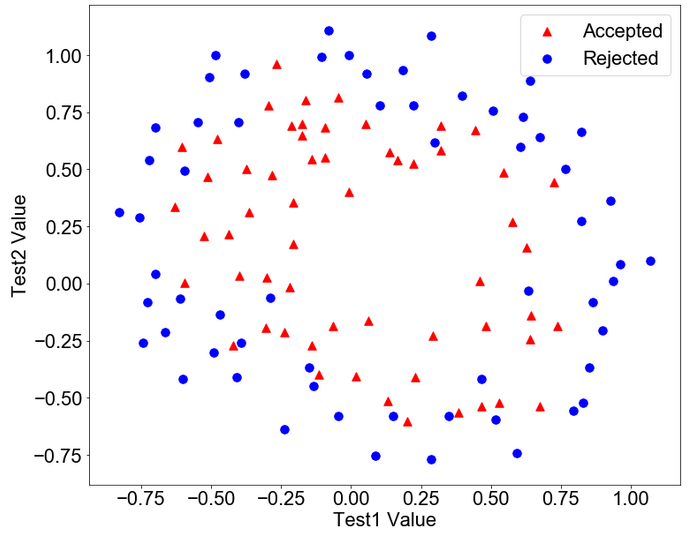

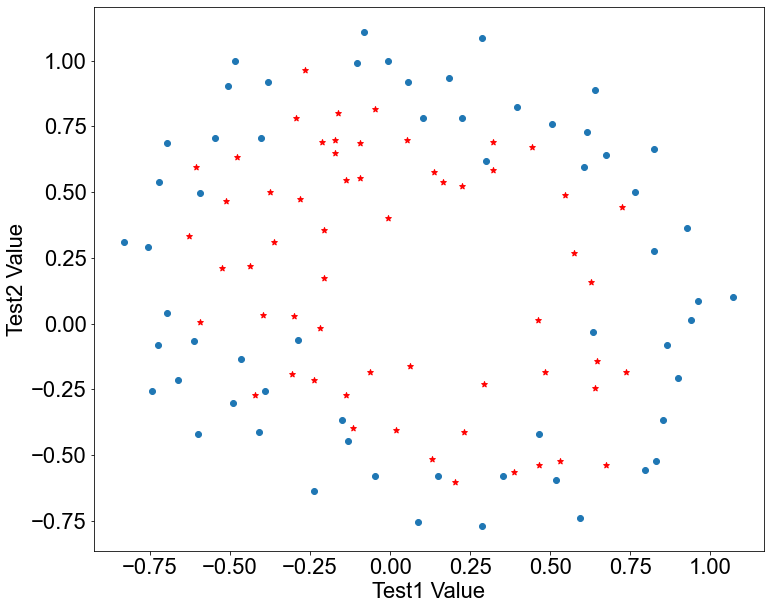

In [29]:
#Dont' modify the line below in any way
plotData(X1pos,X2pos,X1neg,X2neg,'Test1 Value','Test2 Value',"Accepted","Rejected")

It's quite clear, here, that we can't use any kind of straight line to separate the data. We're going to need higher-order polynomial features to draw a more complex decision boundary, that will most likely be some kind of circular or eliptical polygon.

### Dividing Up the Data Into Train-Test Splits

In the previous part of the assignment, we trained on all of the data, and tested on the same (training) data. We saw in lectures that this doesn't make for a very good indicator of accuracy; if you train on a piece of data, your model will most likely do well on that same data.

So, in this part, let's divide up our data into Train and Test portions so that, once we've trained our final model (on the Train part), we'll be able to compute a series of metrics on the Test part to be able to convince ourselves (and our investors) that our model is accurate on new unseen data i.e. that it will work nicely in the real-world.

When splitting up the data, it is quite important to try to ensure that our Train set has equal numbers of samples of each of the classes we are trying to separate i.e. if we have, for example, 30 samples of ```y=0``` in the Train set, then we should have approx. 30 samples of ```y=1``` in the Train set. This is done so that the eventual hypothesis doesn't favour one class over the other. Look this up if you want (unbalanced classes for classification).

In the snippet below, I'm calling the ```train_test_split``` function that we talked about in class. The function has a lot more interesting parameters than we talked about in class e.g.: 

- The ```train_size``` or ```test_size``` can be either a float or an int. If it's specified as a float, it is taken as the percentage of total samples. If it's specified as an int, it is taken as the number of samples.

- The ```stratify``` parameter, once set to the target variable (i.e. ```y``` in this case), will ensure that the Train set has equal numbers of each class in it.

- The ```random_state``` variable serves as a pseudorandom generator seed so that, although we are randomly shuffling our results, we can replicate our results when we run the code repeatedly; for more info on this see this article: https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

Below, I've put in code to randomly draw 30 samples from the available data we have, and ensure that the Train set contains approx equal numbers of ```y=0``` and ```y=1``` samples. Yes a warning is generated; relax.

In [30]:
from sklearn.model_selection import train_test_split

#We're splitting up the data set, so now we'll have two 'm's: one for train (which we'll set), and one for test, 
#which will just be everything that remains from the data
mtrain = 70
mtest = m-mtrain

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=70,random_state=1,stratify=y, shuffle=True)


### Creating Higher-Order Features

As mentioned before, we're going to use higher-order features to draw a complex non-linear decision boundary. To be specific, we're going to use the two basic features we've got ($x_1$ and $x_2$) to create polynomial features up to degree 6 i.e. upto $x_1^6$ and $x_2^6$ as follows:

$$
\begin{align}
y = \begin{bmatrix}
       x_0=1\\
       x_1 \\
       x_2 \\
       x_1^2\\
       x_2^2\\
       x_1x_2\\
       x_1x_2^2\\
       x_1^2x_2\\
       \vdots \\
       x_2^6\\
       x_1^6\\
     \end{bmatrix}
\end{align}
$$

All in all, this results in a 28-dimensional feature vector (including $x_0$). We'll use ```sklearn.preprocessing```'s ```PolynomialFeatures``` function to do this for us very easily. Type in the following code in the region indicated in the function below:

```python 
polytransform = PolynomialFeatures(degree, include_bias=False).fit(X)
X_poly = polytransform.transform(X)
```

Note that I've set ```include_bias``` to False; I don't want to add feature ```x_0``` yet; I want to first scale the data.

Also note that once I've transformed the Train set (```X_train```), I go ahead and also transform the Test set (```X_test```) in the same way right away. 

In [31]:
from sklearn.preprocessing import PolynomialFeatures

def getPolyFeatX(X, degree):
    X_poly = np.zeros((X.shape[0],28))
    polytransform = None
    
    #FILL IN BELOW
    polytransform = PolynomialFeatures(degree, include_bias=False).fit(X)
    X_poly = polytransform.transform(X)
    
    #STOP FILLING IN HERE
    
    return X_poly,polytransform

degree = 6

X_train_poly,polytransform = getPolyFeatX(X_train,degree)

X_test_poly = polytransform.transform(X_test)

#The original n was 2, but now it will increase depending on what we set degree to
nnew = X_train_poly.shape[1]

print("X_train_poly has %i rows, %i features" % (X_train_poly.shape[0],X_train_poly.shape[1]))
print("X_test_poly has %i rows, %i features" % (X_test_poly.shape[0],X_test_poly.shape[1]))

X_train_poly has 70 rows, 27 features
X_test_poly has 48 rows, 27 features


### Scaling the Features and Adding Feature $x_0$

Now, we need to scale the features again and add the column of 1s representing feature $x_0$. Below, I'll just call the ```getScaledX``` function we completed earlier, and then add a column of 1s.

In [32]:
#Don't change in any way

#Scale X_train_poly
X_train_scaled,scalerpt2 = getScaledX(X_train_poly)

#Add feature x0 to X_train_scaled
X_train_mod = np.hstack([np.ones((mtrain,1)),X_train_scaled]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on

#Preview contents of X_train_mod with Pandas
print("X_train_mod:")
display(pd.DataFrame(X_train_mod).head())

#Scale X_test_poly also, using the parameters obtained on the train set
X_test_scaled = scalerpt2.transform(X_test_poly)

#Add feature x0 to X_test_scaled
X_test_mod = np.hstack([np.ones((mtest,1)),X_test_scaled]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on

#Preview contents of X_test_mod with Pandas
print("X_test_mod:")
display(pd.DataFrame(X_test_mod).head())

X_train_mod:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,-1.454053,-0.327970,1.352759,-0.068344,-1.075670,-1.678063,-0.121305,-0.056463,-0.522507,...,-0.430565,-0.048173,-0.458141,0.693618,-0.194802,-0.479239,-0.079884,-0.531051,-0.006754,-0.470486
1,1.0,-0.951552,-0.669349,0.034624,0.346887,-1.018972,-0.545701,-0.523543,-0.102421,-0.530364,...,-0.440048,-0.049565,-0.458297,-0.329312,0.025798,-0.465985,-0.072956,-0.529553,-0.006544,-0.470464
2,1.0,-1.039486,1.350494,0.227643,-2.017649,1.787307,-0.682746,1.607366,-2.716359,1.832654,...,2.807217,-3.250230,1.744038,-0.264059,-0.721846,1.137569,-2.571552,3.239450,-3.206708,1.579533
3,1.0,0.367545,0.710396,-0.944238,0.422654,0.079545,-0.047128,-0.197510,0.244245,0.083820,...,-0.369793,0.094164,-0.228596,-0.430682,-0.040167,-0.488017,-0.066438,-0.485622,0.083731,-0.334537
4,1.0,1.410256,1.009108,0.825089,2.098736,0.781999,1.053715,1.960784,2.054043,0.710473,...,2.065144,1.591411,0.290849,0.101234,1.402938,1.802472,2.251891,1.811514,1.313828,0.091474


X_test_mod:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.053481,0.369011,-1.037131,0.051983,-0.520756,-0.059570,-0.286034,-0.055190,-0.319079,...,-0.431120,-0.049682,-0.420909,-0.430748,-0.040804,-0.491588,-0.079251,-0.531061,-0.007429,-0.455160
1,1.0,-0.851034,-0.939612,-0.166455,0.584155,-0.820897,-0.415547,-0.679247,-0.249932,-0.587315,...,-0.492288,-0.070117,-0.463631,-0.376357,0.039956,-0.421380,-0.040218,-0.509623,-0.000135,-0.468945
2,1.0,0.468063,1.407391,-0.871474,0.841407,1.975859,-0.029983,-0.029869,0.980761,2.068619,...,0.035968,1.268710,2.123877,-0.430372,-0.036427,-0.461741,0.050926,0.030398,1.351791,2.010850
3,1.0,0.694178,-1.906870,-0.631521,-0.939935,0.997272,0.053664,-0.803261,1.046223,-1.975667,...,-1.072002,0.904189,-1.442503,-0.425245,-0.074597,-0.370092,-0.358596,0.104078,-0.816903,0.309559
4,1.0,1.083622,-1.224100,0.029308,-0.821745,-0.466144,0.422951,-1.025757,0.476943,-0.756847,...,-0.702569,0.087223,-0.505107,-0.330814,-0.246771,-0.243044,-0.271055,-0.384704,-0.069420,-0.450234


### Implementing the Regularized Cost Function

Previously we implemented the unregularized cost function for logistic regression. Luckily, the equation for the regularized cost function for logistic regression just adds a single term to the regularized version of the cost function as given below:

$$
\large 
\require{color}
J(\Theta) = −\frac{1}{m}\Big( y^T \cdot \ln(g(X\Theta)) + (1 - y^T) \cdot \ln(1-g(X\Theta)) \Big) + \colorbox{lightgreen}{$\frac{\lambda}{2m}\sum \limits _{j=1}^n\theta_j^2$}\\
$$

The extra term highlighted in $\colorbox{lightgreen}{green}$ can easily be added to the result of the ```costFunction``` that we created earlier on; it is easily computed by:

1. Squaring the theta values
2. Computing the sum of $\theta_1,\ldots,\theta_j$

Remember that we should exclude \$theta_0$ since it is not regularized.

Complete the function below by computing the regulzarization term (either using a for loop or using numpy operations).

To check your work:
- With any $\Theta$ and $\lambda=0$, $J_{\text{reg}}(\Theta)$ should be the same as the original $J(\Theta)$ function value.
- 
- With $\Theta = [0,\ldots,0]$ and any $\lambda$,   $J_{\text{reg}}(\Theta) \approx 0.69315$
- 
- With $\Theta = [0.09,\ldots,0.09]$ $\lambda=100$, $J_{\text{reg}}(\Theta) \approx 1.2356$

**[1.5 marks]**

In [33]:
def costJReg(thetas, X, y, rlambda):
    
    regtermsum = 0 #You need to set this variable correctly
    
    m = X.shape[0] #You might need this, which should be the same as mtrain
    n = X.shape[1] #And this, which should be the same as nnew
    
    #FILL IN BELOW: set regtermsum: this could be done with one for loop, or even with one line with numpy
    tm = rlambda / (2*m)
    thetasum=0
    for i in range(thetas.shape[0]):
        if(i>0):
            thetasum += (thetas[i][0])**2 
    regtermsum = tm*thetasum
    
    #STOP FILLING IN HERE
    
    finalCost = costJ(thetas, X, y) + regtermsum
    
    return float(finalCost)
    

initthetas = np.array([0.09 for i in range(nnew+1)]).reshape((nnew+1,1))
    
print("Cost of UNregularized cost function (costJ): ", costJ(initthetas, X_train_mod, y_train))
print("Cost of REGularized cost function (costJReg) but with lambda=0: ", costJReg(initthetas, X_train_mod, y_train, 0))
print("The two values above should be the same")
print("Cost of REGularized cost function (costJReg) with lambda=100: ", costJReg(initthetas, X_train_mod, y_train, 100))
print("The value above should be higher than the two unregularized costs")


Cost of UNregularized cost function (costJ):  1.0794245345163205
Cost of REGularized cost function (costJReg) but with lambda=0:  1.0794245345163205
The two values above should be the same
Cost of REGularized cost function (costJReg) with lambda=100:  1.2356388202306061
The value above should be higher than the two unregularized costs


### Implementing Regularized Gradient Descent

Now we can go ahead and do gradient descent. Since our cost function changed, our update rules for gradient descent also changed a little bit. If you want, you can copy/paste the code that you put in the (non-regularized) ```gradientDescent``` function earlier and work with that. Noting that $\theta_0$ is not regularized, a vectorized expression for this procedure is as follows: 

$$
\begin{align}
1.\>\>&\text{Produce a vector $\bf q$, of the same size as $\Theta$, that has all ones except for the top-most entry which is zero.}\\
\>\>\>\>&\text{Again, this vector should have that same number of entries as $\Theta$:}\\\\
\>\>\>\>&\large {\bf q} \leftarrow \begin{bmatrix}
           0 \\
           1 \\
           1 \\
           \vdots \\
           1
         \end{bmatrix}\\\\
2.\>\>&\text{Now you can use the following vectorized expression to compute all $\Theta$ at the same time, noting that the symbol "$\odot$" below refers to ${\bf \text{element-wise multiplication}}$ i.e. use "*" symbol in Numpy, or use np.Multiply function:}\\\\
\>\>\>\>&\large\Theta \leftarrow \Theta - \frac{\alpha}{m}\Big[ X^T \big(g(X\Theta)-y\big) + \big(\lambda {\bf q} \odot \Theta\big) \Big]\\\\
\>\>\>\>&\text{Again, $\lambda {\bf q} \odot \Theta$ means multiply $\lambda$ into ${\bf q}$ and then do element-wise multplication of the result with $\Theta$}
\end{align}
$$

In order to help you do a preliminary check to see if your code is apparently working correctly, I've put in code that:

- First makes a call to the original **UN**regularized gradient descent function that you wrote earlier (displayed in the **first** column of the table below); Then it calls the new **REG**ularized gradient descent function that you wrote here, but setting $\lambda=0$ which has the effect of not regularizing at all (displayed in the **second** column of the table below). The two $\Theta$ solutions of columns 1 and 2 should be the same.

- Then, it makes a call to the new **REG**ularized gradient descent function that you wrote here with $\lambda=10$ i.e. it regularizes the model (displayed in the **third** column of the table below). You should see that the $\Theta$ solutions given here should be much smaller than the two previous ones.

To do an exact check to see if your code appears to be working correctly, the regularized values in the third column gradient descent should give the following values, given the following parameters:

- Using Initial $\Theta = [0.09,0.09,\ldots,0.09]$, $\alpha = 0.01$, 400 iterations, $\lambda=0$: Optimal [$\theta_0\ldots\theta_9] \approx [-0.03769647,  0.20902498,  0.29257672, -0.20970893, -0.19503411,
       -0.21953835,  0.2009719 ,  0.05744562, -0.05967816,  0.04030697]$
- 
- Using Initial $\Theta = [0.09,0.09,\ldots,0.09]$, $\alpha = 0.01$, 400 iterations, $\lambda=100$: Optimal [$\theta_0\ldots\theta_9] \approx [-0.00739548,  0.03748538,  0.04106846, -0.06975423, -0.04740284,
       -0.05482589,  0.03673105, -0.00664957, -0.01897085, -0.00751549]$
- 
- Using Initial $\Theta = [0.09,0.09,\ldots,0.09]$, $\alpha = 1$, 400 iterations, $\lambda=100$: Optimal [$\theta_0\ldots\theta_9] \approx [-0.62205052,  0.09749022,  0.65121928, -0.13294728,  0.02176555,
        0.51786338,  0.06730228,  0.46997507, -0.01161999,  0.5779498]$

**[3 marks]**

In [34]:
def gradientDescentReg(X, y, thetas, alpha, max_iterations, rlambda):
    J_hist = []
    J_hist.append(costJReg(thetas, X, y, rlambda))

    for ite in range(max_iterations):
        # Don't modify the code above this point.

        # FILL IN Your code here - but there shouldn't be a loop in here
        gX0 = sigmoid(X.dot(thetas))
        q = np.ones_like(thetas)
        q[0] = 0
        e_wise = ((rlambda*q)*(thetas))
        
        thetas = thetas - (alpha/m)*((X.transpose()).dot(gX0 - y) + e_wise)

        # Stop filling in here: Don't modify the code below this point

        J_hist.append(costJReg(thetas, X, y, rlambda))

    return thetas, J_hist


#Use this snippet to check if gradient descent works correctly
initthetas = np.array([0.09 for i in range(nnew+1)]).reshape((nnew+1,1))

#These two should result in the same thetas
optthetasorig, costs = gradientDescent(X_train_mod,y_train,initthetas,0.01,400)
optthetasnoreg, costs = gradientDescentReg(X_train_mod,y_train,initthetas,0.01,400,0)

#These thetas should be smaller than the ones above
optthetas, costs = gradientDescentReg(X_train_mod,y_train,initthetas,0.01,400,100)

print(optthetas.shape)
combinedsols = pd.DataFrame(np.hstack((optthetasorig,optthetasnoreg,optthetas)))
combinedsols.columns = ['Orig. NonReg. Grad Desc.','Reg. Grad Desc With Lambda=0 (No regularization)','Reg. Grad Desc With Lambda=100']
display(combinedsols.head(n=10))

(28, 1)


,Orig. NonReg. Grad Desc.,Reg. Grad Desc With Lambda=0 (No regularization),Reg. Grad Desc With Lambda=100
0,0.016414,0.016414,0.024075
1,0.135839,0.135839,0.036649
2,0.176233,0.176233,0.039844
3,-0.158457,-0.158457,-0.068471
4,-0.128988,-0.128988,-0.046400
5,-0.140010,-0.140010,-0.053419
6,0.132643,0.132643,0.035919
7,0.021642,0.021642,-0.006933
8,-0.042616,-0.042616,-0.018703
9,0.012371,0.012371,-0.007887


### Plotting the Decision Boundary

Below, I've put in code (you're welcome) to plot the decision boundary for you. It will be used in the next couple of cells. There's also a function to transform a given $x$ with features in the original space into the transformed (higher-order features included, and scaled) space. Examine the code carefully to see what it does, and how it does it. Then run it and move on.

In [35]:
#Not required to modify the code below in any way; just run it.
#But do modify you really want to

def transformSamples(X,polytrans,scaletrans):
    Xpoly = polytrans.transform(X)
    Xscaled = scaletrans.transform(Xpoly)
    Xmod = np.hstack([np.ones((Xscaled.shape[0],1)),Xscaled])
    return Xmod

def plotDecisionBoundary(X, y, X1pos,X2pos,X1neg,X2neg, thetas, polytrans, scaletrans):
    # Set min and max values and give it some padding
    font = {'family' : 'Arial',
        'size'   : 22}

    matplotlib.rc('font', **font)
    
    fig = plt.figure(figsize=(12,10))
    
    X = X.T
    y = y.reshape(1, y.shape[0]).ravel()
    
    ff = 0.2
    x_min, x_max = X[0, :].min() - ff, X[0, :].max() + ff
    y_min, y_max = X[1, :].min() - ff, X[1, :].max() + ff
    h = 0.02
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    dd = np.c_[xx.ravel(), yy.ravel()]
    ddmod = transformSamples(dd,polytrans,scaletrans)
    Z = predict(ddmod,thetas).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels = [0,0.5,1,2],colors=['#F99595','#9CA6F9','#9CA6F9'])
    plt.contour(xx, yy, Z, colors=['m'])
    plotData(X1pos,X2pos,X1neg,X2neg,'Test1 Value','Test2 Value',"Accepted","Rejected",False) 
    

Ok now to draw some boundaries. The code cell below first calls the regularized gradient descent function without any regularization ($\lambda=0$). It then plots the data and the decision boundary that results from gradient descent. You can (hopefully) see that the decision boundary is quite contorted, and appears to be "trying too hard" to separate the points i.e. it is overfitting i.e. it has high variance.

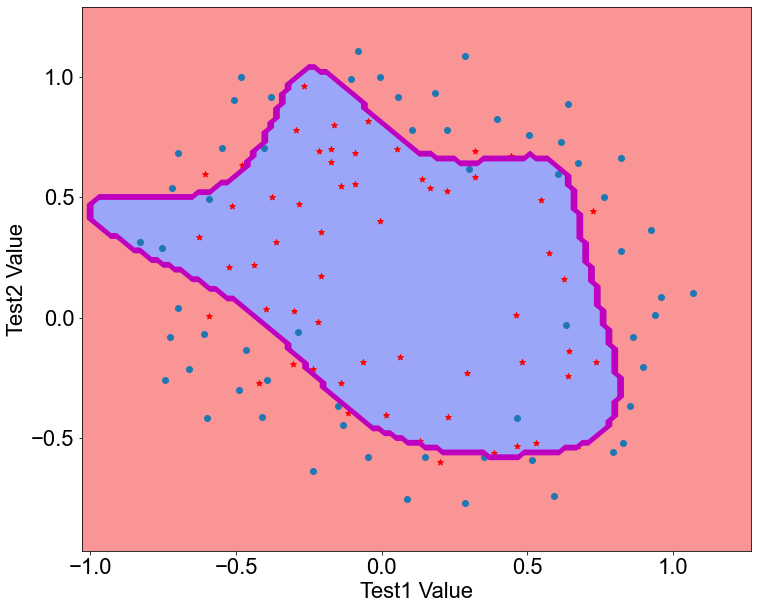

In [36]:
#First call gradient descent again with desired params
initthetas = np.array([0.09 for i in range(nnew+1)]).reshape((nnew+1,1))
optthetas1, costs = gradientDescentReg(X_train_mod,y_train,initthetas,2,4000,0)

#Now plot it
plotDecisionBoundary(X,y,X1pos,X2pos,X1neg,X2neg,optthetas1,polytransform, scalerpt2)

Now let's repeat the plot, but this time we'll set $\lambda$ to a much larger value ($\lambda=50$). This regularizes the model "too much" and reduces the model to effectively just a line; the model now underfits the data quite badly i.e. the model has high bias.

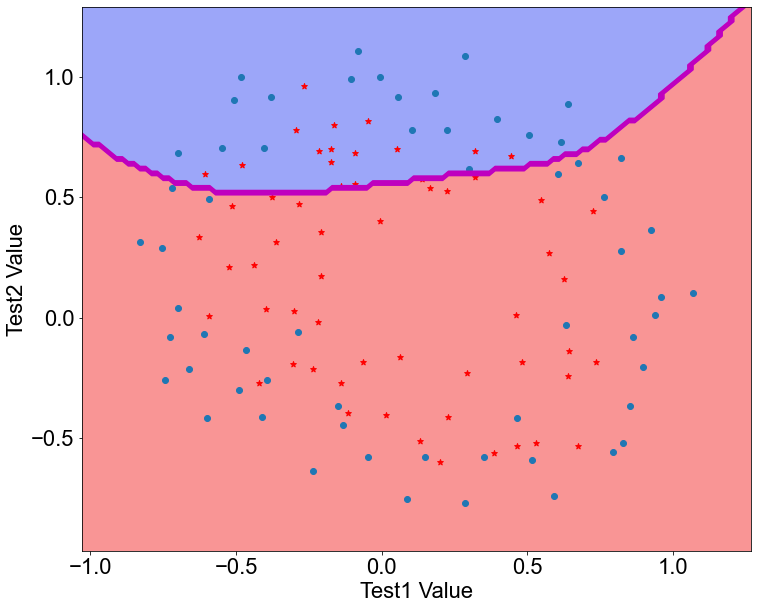

In [37]:
#Not required to modify the code below in any way; just run it.
#But do modify you really want to

#First call gradient descent again with desired params
initthetas = np.array([0.09 for i in range(nnew+1)]).reshape((nnew+1,1))
optthetas2, costs = gradientDescentReg(X_train_mod,y_train,initthetas,2,4000,50)

#Now plot it
plotDecisionBoundary(X,y,X1pos,X2pos,X1neg,X2neg,optthetas2,polytransform, scalerpt2)

So clearly we need to set $\lambda$ to something between 0 and 50, so that the model is more "reasonable". We'll set $\lambda=4$. This regularizes the model just enough; it is a reasonable looking elipse of sorts. 

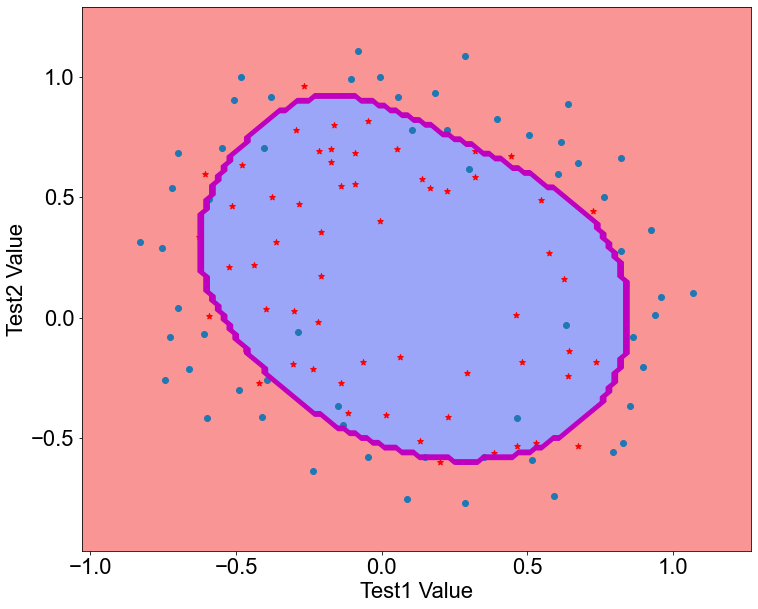

In [38]:
#Not required to modify the code below in any way; just run it.
#But do modify you really want to

#First call gradient descent again with desired params
initthetas = np.array([0.09 for i in range(nnew+1)]).reshape((nnew+1,1))
optthetas3, costs = gradientDescentReg(X_train_mod,y_train,initthetas,2,4000,4)

#Now plot it
plotDecisionBoundary(X,y,X1pos,X2pos,X1neg,X2neg,optthetas3,polytransform, scalerpt2)

### Model Selection

Just to give you a taste of how to compare models, let's split up the Test data half-half into a "CV" portion and "FinalTest" portion. We'll compare the three models above using the "CV" data. Once we've decided which to pick (which does the best on the "CV" set), we'll evaluate that one on the "FinalTest" portion to show our investors how well it does on completely new unseen data.

In [39]:
#Divide up X_test and y_test 50% into CV and test portions
X_cv, X_finaltest, y_cv, y_finaltest = train_test_split(X_test_mod,y_test,train_size=0.5,random_state=1,stratify=y_test, shuffle=True)

#Predict on the thetas of the first model (overfitting one)



accs = []
recs = []
precs = []
thets = [optthetas1,optthetas2,optthetas3]
X_cv.shape

for i in range(3):
    #Predict on cv data using model i
    ypred = predict(X_cv,thets[i])
    
    accskl = round(sklm.accuracy_score(y_true=y_cv,y_pred=ypred),2)
    recskl = round(sklm.recall_score(y_true=y_cv,y_pred=ypred),2)
    precskl = round(sklm.precision_score(y_true=y_cv,y_pred=ypred),2)
    f1skl = round(sklm.f1_score(y_true=y_cv,y_pred=ypred),2)
    
    print("Model " + str(i+1) + " Results:")
    print("Accuracy is " + str(accskl*100))
    print("Recall is " + str(recskl*100))
    print("Precision is " + str(precskl*100))
    print("F1 Score is " + str(f1skl*100))
    print("")

Model 1 Results:
Accuracy is 67.0
Recall is 67.0
Precision is 67.0
F1 Score is 67.0

Model 2 Results:
Accuracy is 50.0
Recall is 17.0
Precision is 50.0
F1 Score is 25.0

Model 3 Results:
Accuracy is 79.0
Recall is 75.0
Precision is 82.0
F1 Score is 78.0



Clearly, Model 3 (the one with $\lambda=20$) out-performs the other two by miles! And clearly, the model with high bias (which one am I talking about?) does the worst; a line can only do so much. Anyway, we will now select Model 3 as our FINAL model. We still need to evaluate it on some new data to give our investors confidence; next, we'll evaluate it on the "finaltest" test set.

### Final Evaluation

Ok, below we're evaluating Model 3 on only the "FinalTest" data.

In [40]:
ypred = predict(X_finaltest,optthetas3)

accskl = round(sklm.accuracy_score(y_true=y_finaltest,y_pred=ypred),2)
recskl = round(sklm.recall_score(y_true=y_finaltest,y_pred=ypred),2)
precskl = round(sklm.precision_score(y_true=y_finaltest,y_pred=ypred),2)
f1skl = round(sklm.f1_score(y_true=y_finaltest,y_pred=ypred),2)

print("Model " + str(i+1) + " Results:")
print("Accuracy is " + str(accskl*100))
print("Recall is " + str(recskl*100))
print("Precision is " + str(precskl*100))
print("F1 Score is " + str(f1skl*100))

Model 3 Results:
Accuracy is 92.0
Recall is 83.0
Precision is 100.0
F1 Score is 91.0


So we got the results above. What can we tell our investors about our final model? If you're not sure, go back to the lectures on the classification metrics to see what they mean.

### Have Some Fun

The cell below just combines all of the above: it allows you to set degree and lambda, and then it plots it for you.

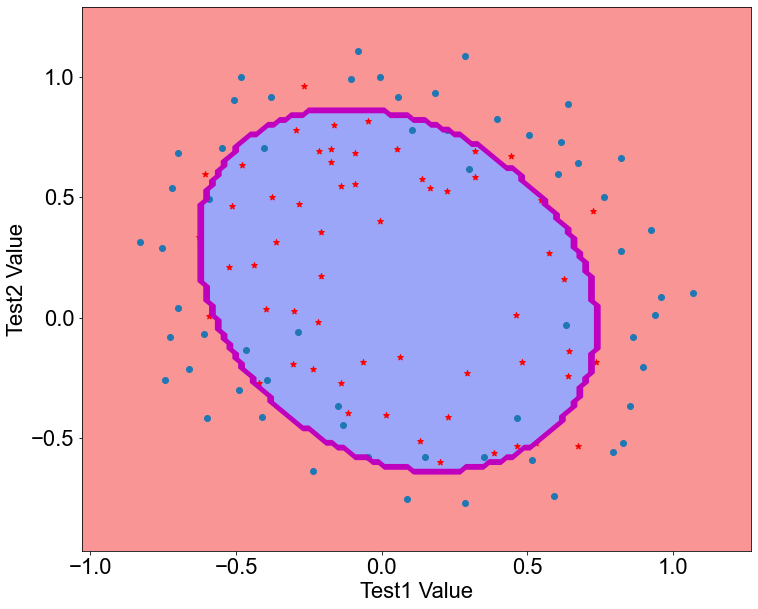

In [41]:
degree = 3
lambdaf = 5

mall = X.shape[0]

X_all_poly,polytransformall = getPolyFeatX(X,degree)

#The original n was 2, but now it will increase depending on what we set degree to
nnewfinal = X_all_poly.shape[1]

#Scale X_train_poly
X_all_scaled,scalerpt3 = getScaledX(X_all_poly)

#Add feature x0 to X_train_scaled
X_all_mod = np.hstack([np.ones((mall,1)),X_all_scaled]) #Add a column of 1s to X which will serve as the so-called x_0 feature: store the result in X_mod which we'll be using from now on

#First call gradient descent again with desired params
initthetas = np.array([0.09 for i in range(nnewfinal+1)]).reshape((nnewfinal+1,1))
optthetasfinal, costs = gradientDescentReg(X_all_mod,y,initthetas,2,4000,lambdaf)

#Now plot it
plotDecisionBoundary(X,y,X1pos,X2pos,X1neg,X2neg,optthetasfinal,polytransformall, scalerpt3)